# **Diabetes Prediction – Machine Learning Pipeline**


#### **About Me**:


#### **1. Project Overview**

* **Objective:** Predict the probability that a patient will be diagnosed with diabetes.
* **Business Value:** Early detection can guide interventions, reduce healthcare costs, and improve patient outcomes.
* **Problem Type:** Binary classification.
* **Evaluation Metric:** Area Under the ROC Curve (ROC AUC).
* **Data Source:** [Kaggle Playground Series S5E12 – Diabetes Prediction Dataset](https://www.kaggle.com/competitions/playground-series-s5e12/data)


#### **2. Dataset Overview**
The dataset consists of tabular data with 53 features, including patient health indicators and demographic information and target variable is `diagnosed_diabetes`


#### **3. Project Workflow**

<!-- ###### **3.1 Data Loading**

* Load train, test, and sample submission files using `pandas`.
* Quick check of data shape, missing values, and data types.

###### **3.2 Data Cleaning**

* **Missing Values:**

  * Identify using `.isnull().sum()`.
  * Impute using median/mean for numerical features.
  * Impute or encode missing categorical values as "Unknown".
* **Duplicates:**

  * Check for duplicates using `.duplicated()`.
* **Data Consistency:**

  * Ensure correct ranges for numerical features.
  * Handle categorical label mismatches.

### **3.3 Exploratory Data Analysis (EDA)**

* **Target Analysis:**

  * Plot distribution of `diagnosed_diabetes`.
* **Feature Analysis:**

  * Numerical features: histogram, boxplot, distribution comparison.
  * Categorical features: countplots, frequency tables.
* **Feature Relationships:**

  * Correlation heatmap to identify multicollinearity.
  * Pairplots for key numerical features.
* **Train vs Test Distribution:**

  * Compare distributions to detect synthetic data shifts.

### **3.4 Feature Engineering**

* **Scaling and Normalization:**

  * StandardScaler / MinMaxScaler for numerical features.
* **Encoding Categorical Features:**

  * One-hot encoding or target encoding.
* **Interaction Features:**

  * Combine correlated features if meaningful.
* **Missing Feature Indicators:**

  * Create binary columns indicating missing values if necessary.

### **3.5 Data Preprocessing Pipeline**

* Define **industrial-level pipeline**:

  * Imputation → Scaling → Encoding → Feature Engineering
  * Use `sklearn.pipeline.Pipeline` for reproducibility.
* Save pipeline for production reuse.

### **3.6 Model Selection**

* Start with baseline models:

  * Logistic Regression
  * Decision Trees / Random Forest
  * Gradient Boosting (XGBoost, LightGBM, CatBoost)
* Consider ensemble models for improved performance.

### **3.7 Model Training & Validation**

* **Train-Test Split:** 80/20 or Stratified K-Fold CV.
* **Cross-Validation:** Stratified K-Fold to handle class imbalance.
* **Hyperparameter Tuning:** GridSearchCV / RandomizedSearchCV.
* **Evaluation Metrics:**

  * ROC AUC (primary)
  * Accuracy, Precision, Recall, F1-Score for reference.
* **Feature Importance Analysis:** Identify key drivers of diabetes prediction.

### **3.8 Model Evaluation**

* **Validation Set Metrics**

  * ROC AUC score
  * Confusion matrix visualization
* **Cross-Validation Metrics**

  * Mean and standard deviation across folds
* **Overfitting Check**

  * Compare train vs validation scores

### **3.9 Prediction on Test Data**

* Apply preprocessing pipeline to test data.
* Generate probabilities for `diagnosed_diabetes`.
* Save predictions in required submission format.

### **3.10 Model Interpretability**

* **SHAP / LIME Analysis:**

  * Understand feature contribution per prediction.
* **Global Feature Importance**

  * Identify top 10 predictors.

### **3.11 Deployment Considerations**

* **Pipeline Export:** Save preprocessing + model as `.pkl` using `joblib`.
* **Inference API:** Flask/FastAPI endpoint for predictions.
* **Monitoring:**

  * Monitor prediction distribution for data drift.
  * Track model performance over time.

---

## **4. Project Documentation**

* **Notebook should include:**

  * Markdown cells explaining each step.
  * Code cells executing each part.
  * Visualizations for EDA and model performance.
* **Industrial-Level Requirements:**

  * Reproducibility
  * Clean code with modular functions
  * Logging and error handling
  * Versioning of data, code, and models

---

## **5. Optional Enhancements**

* Hyperparameter optimization with Optuna or Bayesian methods.
* Stacking / Blending multiple models.
* Feature selection techniques.
* Automated EDA reports (e.g., using `pandas-profiling`). -->


### **Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier


In [3]:
train_path = "../dataset/train.csv"
test_path = "../dataset/test.csv"

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

In [12]:
# to show all columns 
pd.set_option('display.max_columns', None)

In [4]:
train_df.head()

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,...,gender,ethnicity,education_level,income_level,smoking_status,employment_status,family_history_diabetes,hypertension_history,cardiovascular_history,diagnosed_diabetes
0,0,31,1,45,7.7,6.8,6.1,33.4,0.93,112,...,Female,Hispanic,Highschool,Lower-Middle,Current,Employed,0,0,0,1.0
1,1,50,2,73,5.7,6.5,5.8,23.8,0.83,120,...,Female,White,Highschool,Upper-Middle,Never,Employed,0,0,0,1.0
2,2,32,3,158,8.5,7.4,9.1,24.1,0.83,95,...,Male,Hispanic,Highschool,Lower-Middle,Never,Retired,0,0,0,0.0
3,3,54,3,77,4.6,7.0,9.2,26.6,0.83,121,...,Female,White,Highschool,Lower-Middle,Current,Employed,0,1,0,1.0
4,4,54,1,55,5.7,6.2,5.1,28.8,0.90,108,...,Male,White,Highschool,Upper-Middle,Never,Retired,0,1,0,1.0


In [14]:
test_df.head()

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,heart_rate,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,gender,ethnicity,education_level,income_level,smoking_status,employment_status,family_history_diabetes,hypertension_history,cardiovascular_history
0,700000,45,4,100,4.3,6.8,6.2,25.5,0.84,123,70,64,209,55,135,111,Female,White,Highschool,Middle,Former,Employed,0,0,0
1,700001,35,1,87,3.5,4.6,9.0,28.6,0.88,120,74,59,159,47,83,145,Female,White,Highschool,Middle,Never,Unemployed,0,0,0
2,700002,45,1,61,7.6,6.8,7.0,28.5,0.94,112,71,75,173,43,99,184,Male,White,Highschool,Low,Never,Employed,0,0,0
3,700003,55,2,81,7.3,7.3,5.0,26.9,0.91,114,81,61,203,59,116,128,Male,White,Graduate,Middle,Former,Employed,0,0,0
4,700004,77,2,29,7.3,7.6,8.5,22.0,0.83,131,78,79,177,59,87,133,Male,White,Graduate,Low,Current,Unemployed,0,0,0


In [16]:

# basic dataset checks

def eda_checks(train_df, test_df):
    print("===== TRAINING SET INFO =====")
    print(train_df.info())
    
    print("\nChecking for duplicates in TRAINING SET:")
    train_duplicates = train_df.duplicated().sum()
    print(f"Total duplicate rows in train: {train_duplicates}")
    
    print("\nChecking for null values in TRAINING SET:")
    print(train_df.isnull().sum())
    
    print("\n===== TEST SET INFO =====")
    print(test_df.info())
    
    print("\nChecking for duplicates in TEST SET:")
    test_duplicates = test_df.duplicated().sum()
    print(f"Total duplicate rows in test: {test_duplicates}")
    
    print("\nChecking for null values in TEST SET:")
    print(test_df.isnull().sum())




 # column type summary
def column_summary(train_df, test_df):
    # Categorical columns
    cat_train = train_df.select_dtypes(include='object').columns.tolist()
    cat_test = test_df.select_dtypes(include='object').columns.tolist()
    
    # Numerical columns
    num_train = train_df.select_dtypes(include=['int64','float64']).columns.tolist()
    num_test = test_df.select_dtypes(include=['int64','float64']).columns.tolist()
    
    # Display summary nicely
    print("✅ CATEGORICAL COLUMNS SUMMARY")
    print(f"Total categorical columns in TRAIN: {len(cat_train)}")
    print("Columns in TRAIN: ", ", ".join(cat_train))
    print("\nColumns in TEST: ", ", ".join(cat_test))
    print(f"Total categorical columns in TEST: {len(cat_test)}")
    
    print("\n✅ NUMERICAL COLUMNS SUMMARY")
    print(f"Total numerical columns in TRAIN: {len(num_train)}")
    print("Columns in TRAIN: ", ", ".join(num_train))
    print("\nColumns in TEST: ", ", ".join(num_test))
    print(f"Total numerical columns in TEST: {len(num_test)}")
    

In [17]:
eda_checks(train_df, test_df)

===== TRAINING SET INFO =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 26 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   id                                  700000 non-null  int64  
 1   age                                 700000 non-null  int64  
 2   alcohol_consumption_per_week        700000 non-null  int64  
 3   physical_activity_minutes_per_week  700000 non-null  int64  
 4   diet_score                          700000 non-null  float64
 5   sleep_hours_per_day                 700000 non-null  float64
 6   screen_time_hours_per_day           700000 non-null  float64
 7   bmi                                 700000 non-null  float64
 8   waist_to_hip_ratio                  700000 non-null  float64
 9   systolic_bp                         700000 non-null  int64  
 10  diastolic_bp                        700000 non-null  int64  
 

The dataset contains 700k training and 300k test records with columns and no missing or duplicate values for diabetes prediction.

In [18]:

column_summary(train_df, test_df)


✅ CATEGORICAL COLUMNS SUMMARY
Total categorical columns in TRAIN: 6
Columns in TRAIN:  gender, ethnicity, education_level, income_level, smoking_status, employment_status

Columns in TEST:  gender, ethnicity, education_level, income_level, smoking_status, employment_status
Total categorical columns in TEST: 6

✅ NUMERICAL COLUMNS SUMMARY
Total numerical columns in TRAIN: 20
Columns in TRAIN:  id, age, alcohol_consumption_per_week, physical_activity_minutes_per_week, diet_score, sleep_hours_per_day, screen_time_hours_per_day, bmi, waist_to_hip_ratio, systolic_bp, diastolic_bp, heart_rate, cholesterol_total, hdl_cholesterol, ldl_cholesterol, triglycerides, family_history_diabetes, hypertension_history, cardiovascular_history, diagnosed_diabetes

Columns in TEST:  id, age, alcohol_consumption_per_week, physical_activity_minutes_per_week, diet_score, sleep_hours_per_day, screen_time_hours_per_day, bmi, waist_to_hip_ratio, systolic_bp, diastolic_bp, heart_rate, cholesterol_total, hdl_choles

In [19]:
train_df.describe()

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,heart_rate,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,family_history_diabetes,hypertension_history,cardiovascular_history,diagnosed_diabetes
count,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000
mean,349999.500000,50.359734,2.072411,80.230803,5.963695,7.002200,6.012733,25.874684,0.858766,116.294193,75.440924,70.167749,186.818801,53.823214,102.905854,123.081850,0.149401,0.181990,0.030324,0.623296
std,202072.738554,11.655520,1.048189,51.195071,1.463336,0.901907,2.022707,2.860705,0.037980,11.010390,6.825775,6.938722,16.730832,8.266545,19.022416,24.739397,0.356484,0.385837,0.171478,0.484560
min,0.000000,19.000000,1.000000,1.000000,0.100000,3.100000,0.600000,15.100000,0.680000,91.000000,51.000000,42.000000,117.000000,21.000000,51.000000,31.000000,0.000000,0.000000,0.000000,0.000000
25%,174999.750000,42.000000,1.000000,49.000000,5.000000,6.400000,4.600000,23.900000,0.830000,108.000000,71.000000,65.000000,175.000000,48.000000,89.000000,106.000000,0.000000,0.000000,0.000000,0.000000
50%,349999.500000,50.000000,2.000000,71.000000,6.000000,7.000000,6.000000,25.900000,0.860000,116.000000,75.000000,70.000000,187.000000,54.000000,103.000000,123.000000,0.000000,0.000000,0.000000,1.000000
75%,524999.250000,58.000000,3.000000,96.000000,7.000000,7.600000,7.400000,27.800000,0.880000,124.000000,80.000000,75.000000,199.000000,59.000000,116.000000,139.000000,0.000000,0.000000,0.000000,1.000000
max,699999.000000,89.000000,9.000000,747.000000,9.900000,9.900000,16.500000,38.400000,1.050000,163.000000,104.000000,101.000000,289.000000,90.000000,205.000000,290.000000,1.000000,1.000000,1.000000,1.000000


## **EDA**

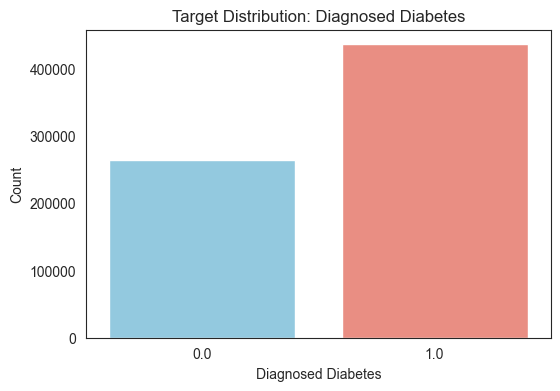

Target Proportion:
diagnosed_diabetes
1.0    0.623296
0.0    0.376704
Name: proportion, dtype: float64


In [36]:
sns.set_style("white")

palette=['skyblue','salmon']

# target distribution

plt.figure(figsize=(6,4))
sns.countplot(x="diagnosed_diabetes", data=train_df, palette=palette)
plt.title("Target Distribution: Diagnosed Diabetes")
plt.xlabel("Diagnosed Diabetes")
plt.ylabel("Count")
plt.show()
print("Target Proportion:")
print(train_df["diagnosed_diabetes"].value_counts(normalize=True))

In [30]:
# categorical columns
categorical_cols = train_df.select_dtypes(include=["object"]).columns.tolist()

numerical_cols = train_df.select_dtypes(include=[np.number]).columns.tolist()
numerical_cols.remove("diagnosed_diabetes") # excluding the target



In [31]:
#  CATEGORICAL COLUMNS
#  [gender, ethnicity, education_level, income_level, smoking_status, employment_status]

In [32]:
# NUMERICAL COLUMNS
# [ id, age, alcohol_consumption_per_week, physical_activity_minutes_per_week, diet_score, sleep_hours_per_day, screen_time_hours_per_day, bmi, waist_to_hip_ratio, systolic_bp, diastolic_bp, heart_rate, cholesterol_total, hdl_cholesterol, ldl_cholesterol, triglycerides, family_history_diabetes, hypertension_history, cardiovascular_history]


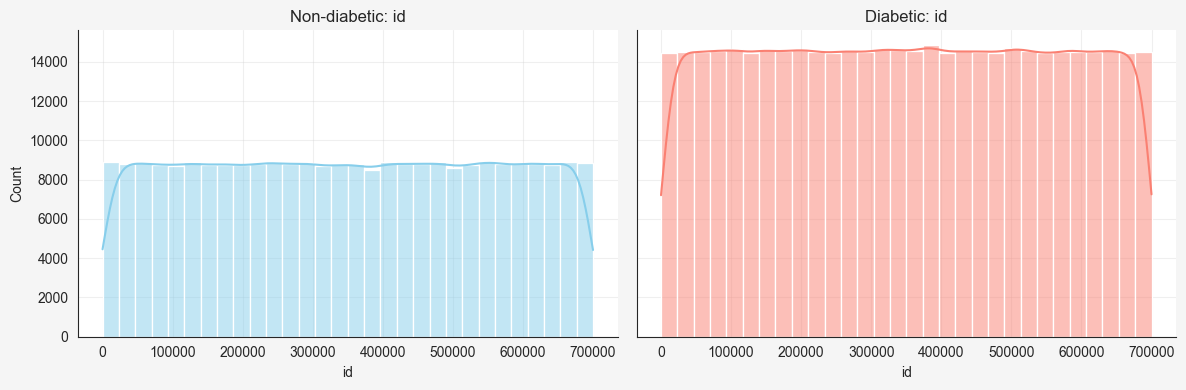

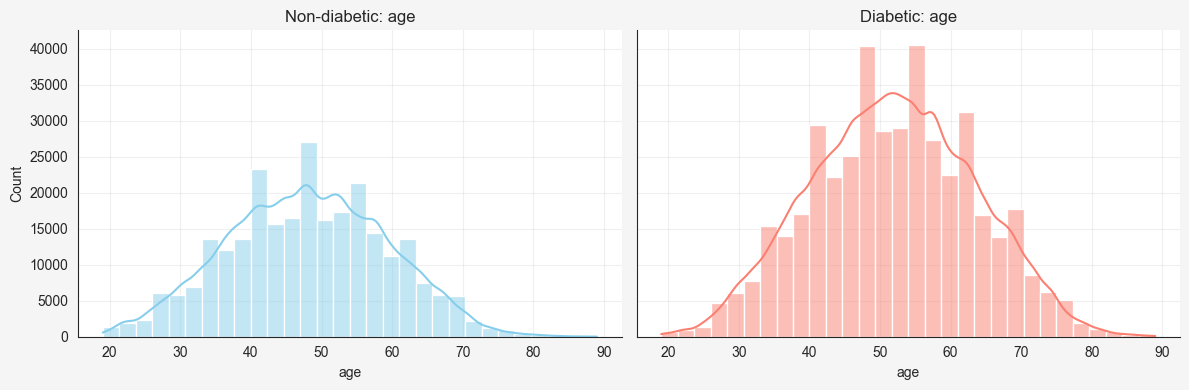

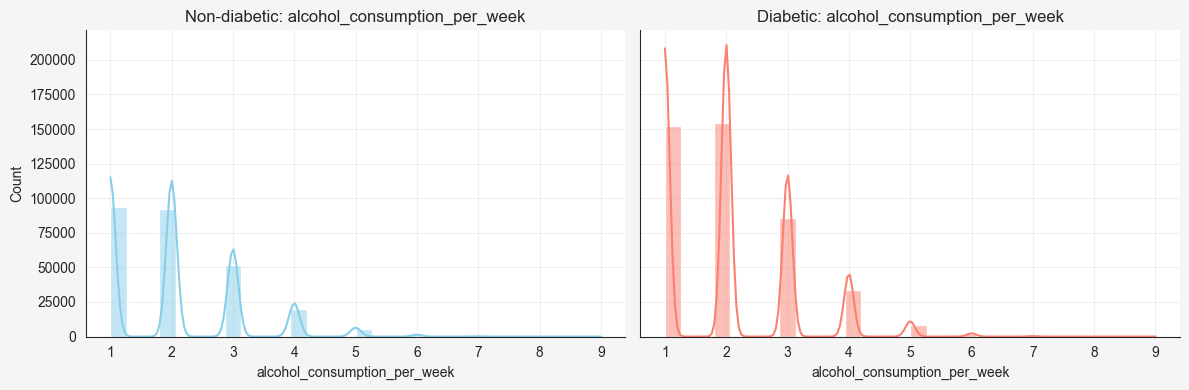

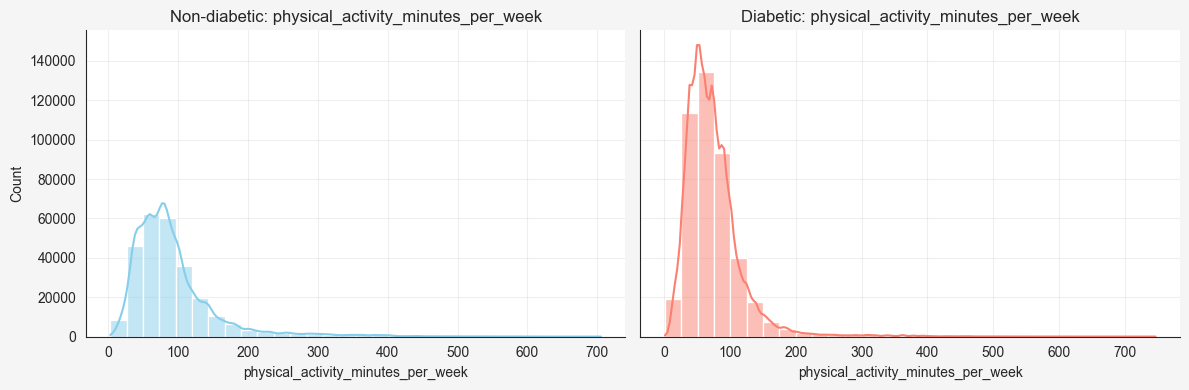

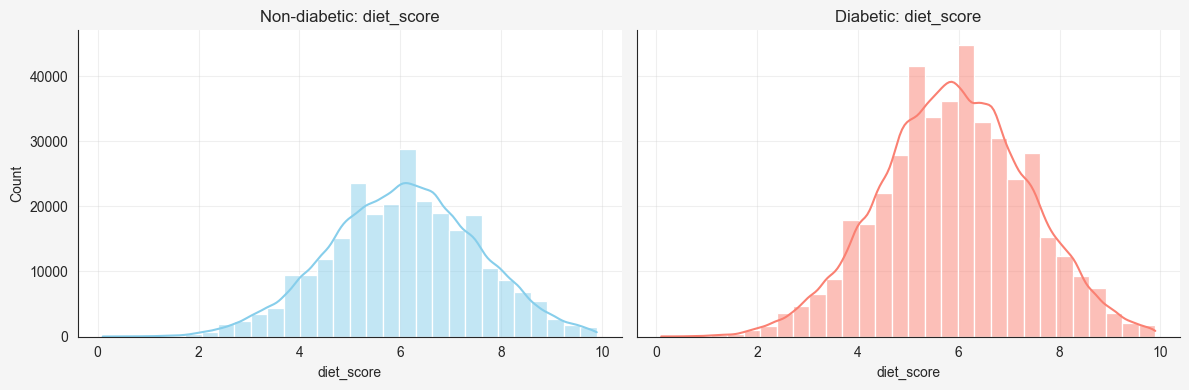

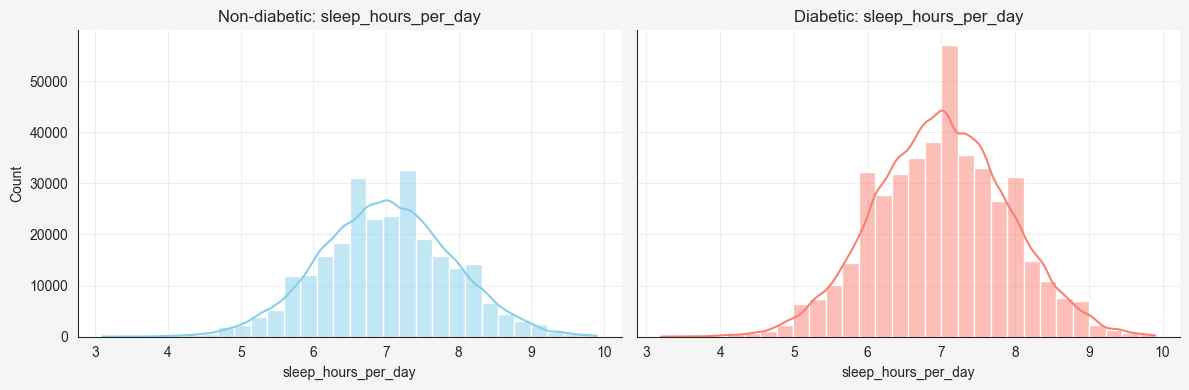

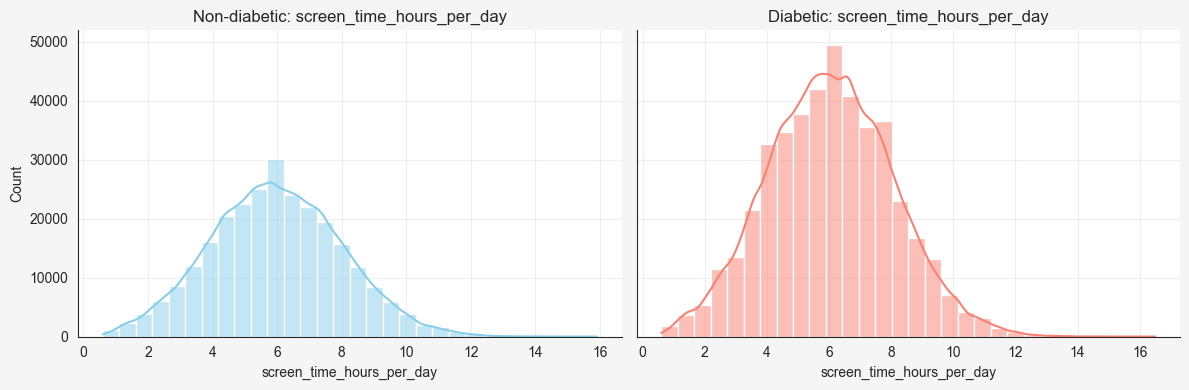

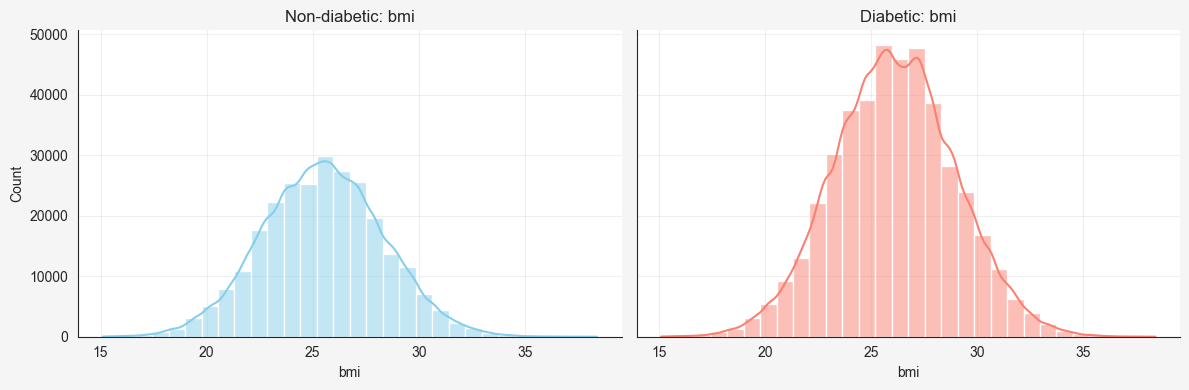

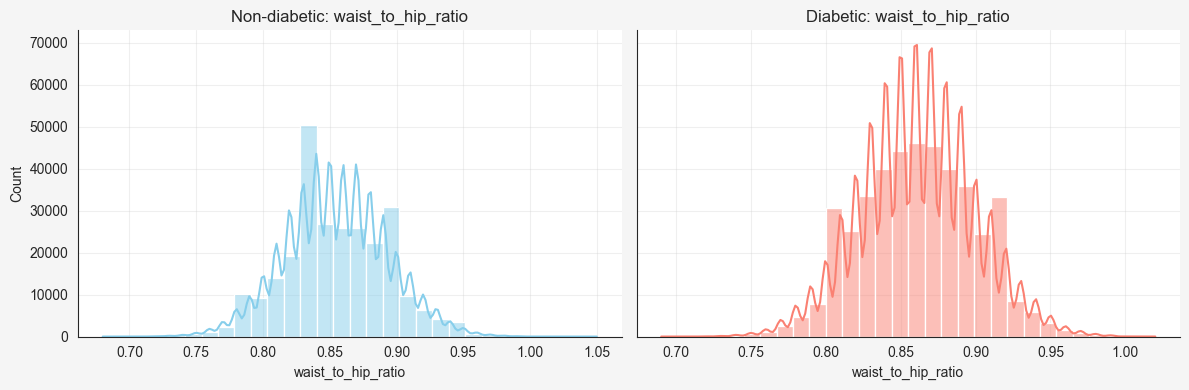

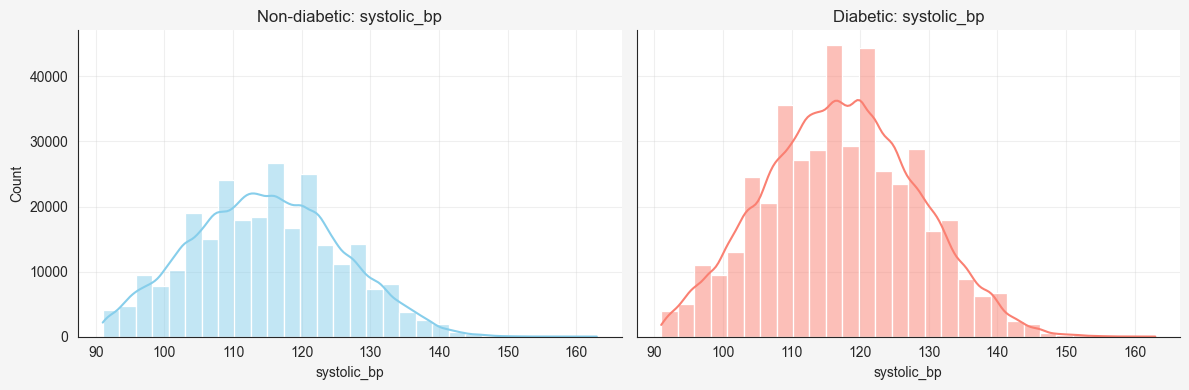

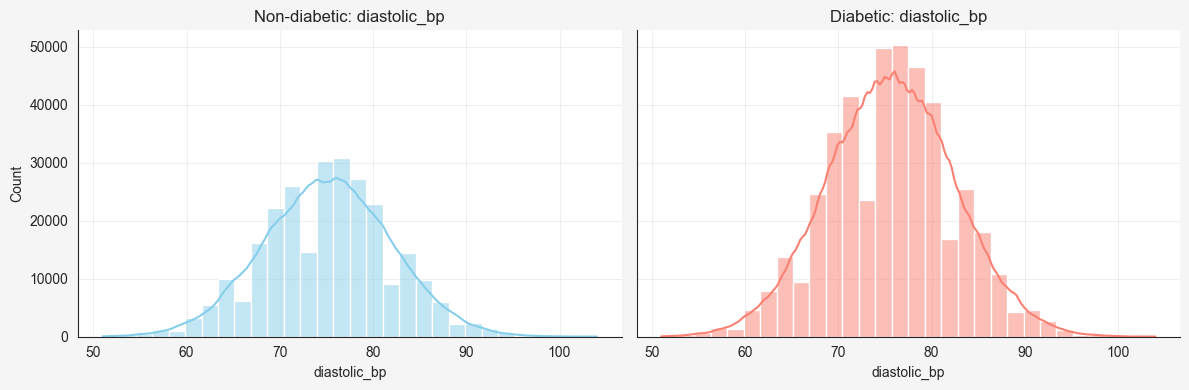

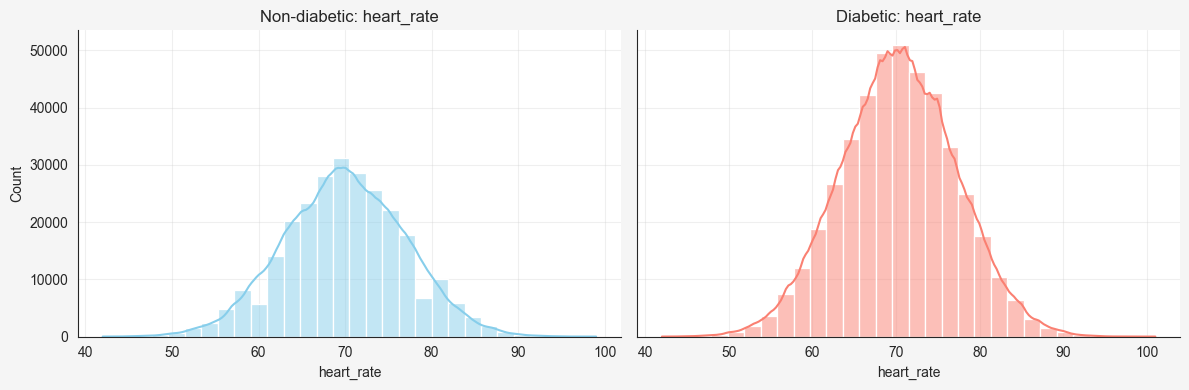

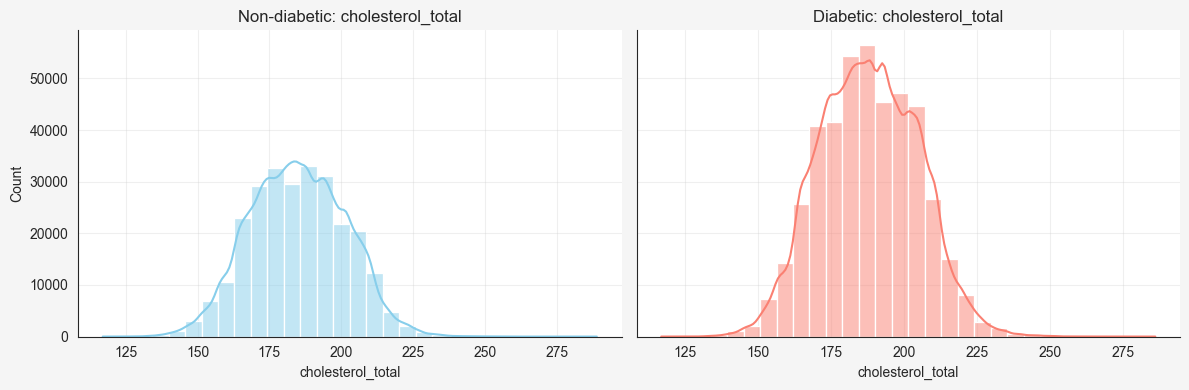

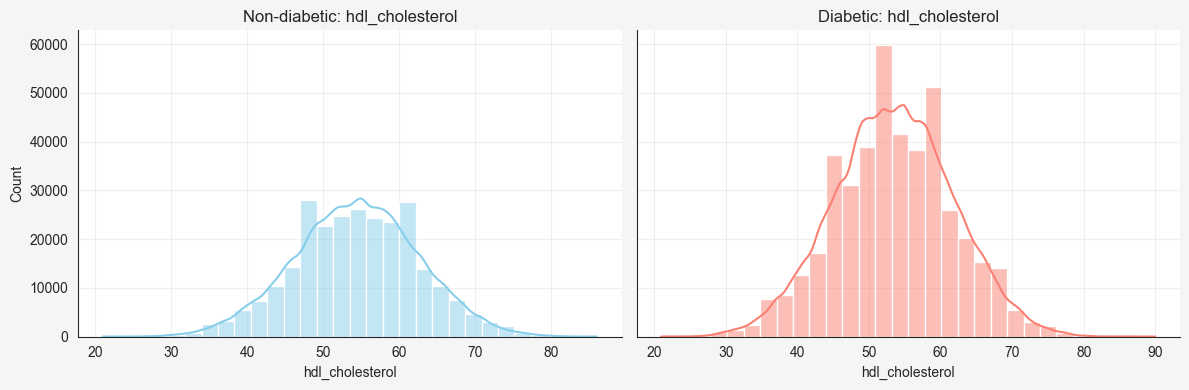

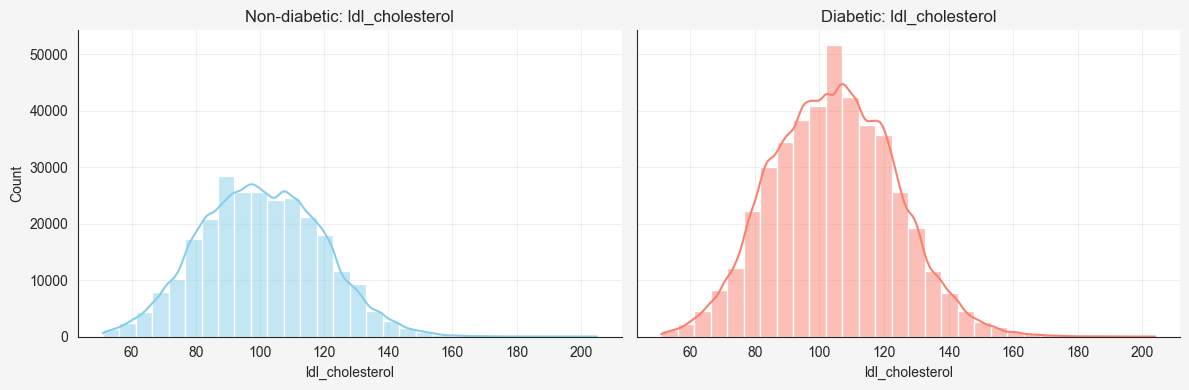

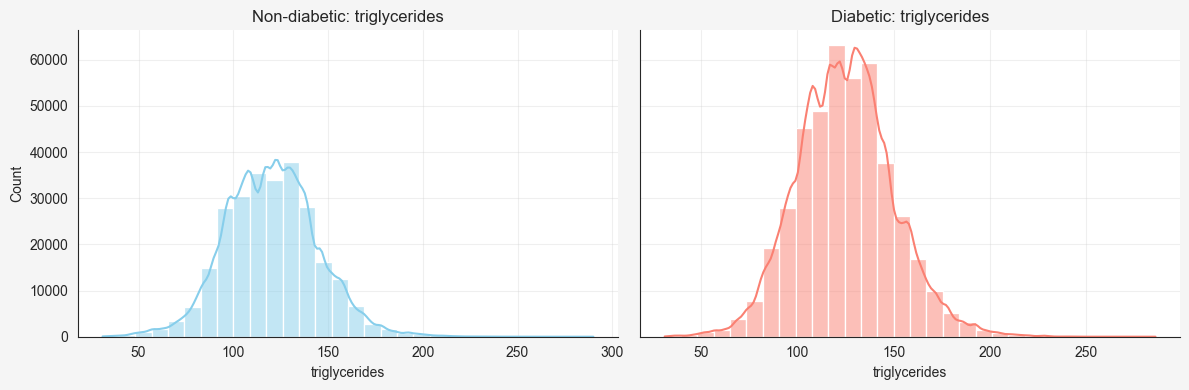

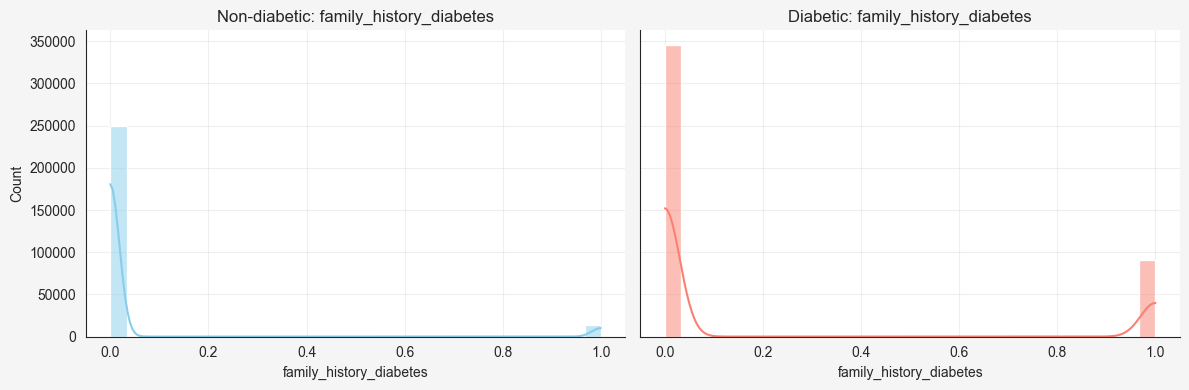

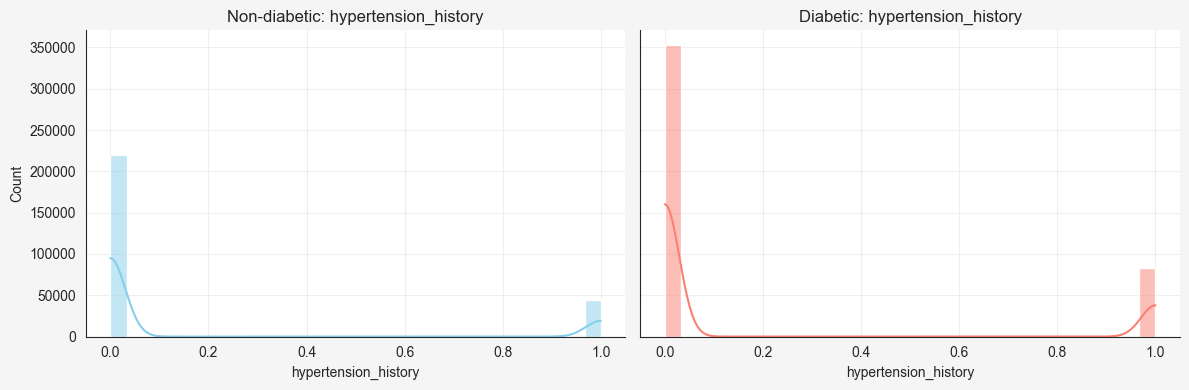

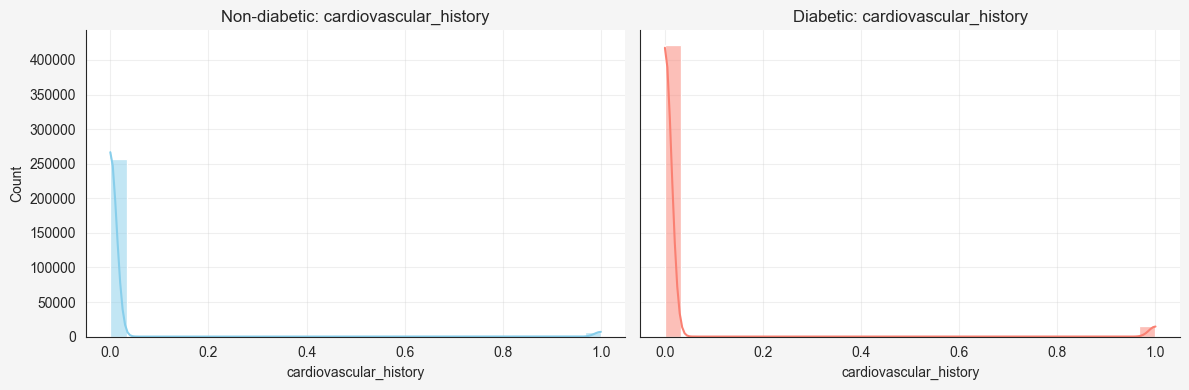

In [37]:
# distribution of numerical columns


for col in numerical_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12,4), sharey=True)
    fig.patch.set_facecolor("#F5F5F5")  # light background

    # Non-diabetic
    sns.histplot(train_df[train_df['diagnosed_diabetes']==0][col], bins=30, kde=True, ax=axes[0], color='skyblue')
    axes[0].set_title(f"Non-diabetic: {col}")
    
    # Diabetic
    sns.histplot(train_df[train_df['diagnosed_diabetes']==1][col], bins=30, kde=True, ax=axes[1], color='salmon')
    axes[1].set_title(f"Diabetic: {col}")

    for ax in axes:
        ax.grid(alpha=0.3)
        for spine in ["top", "right"]:
            ax.spines[spine].set_visible(False)

    plt.tight_layout()
    plt.show()


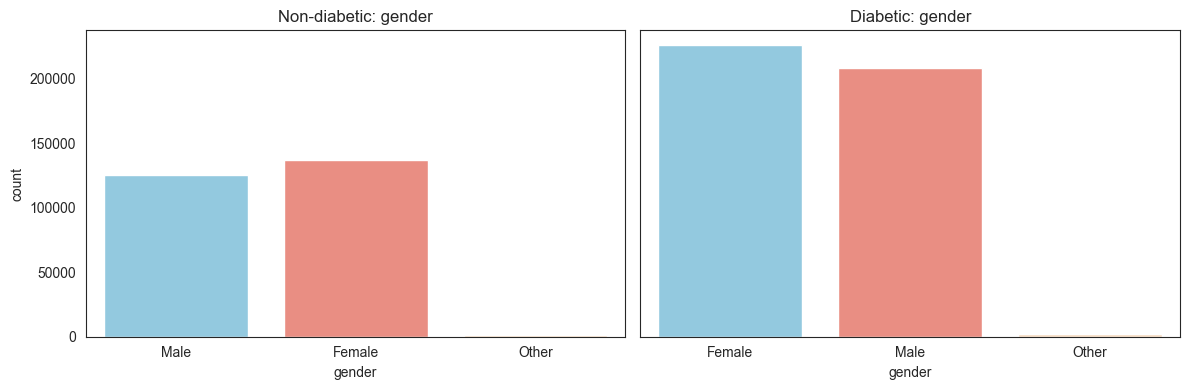

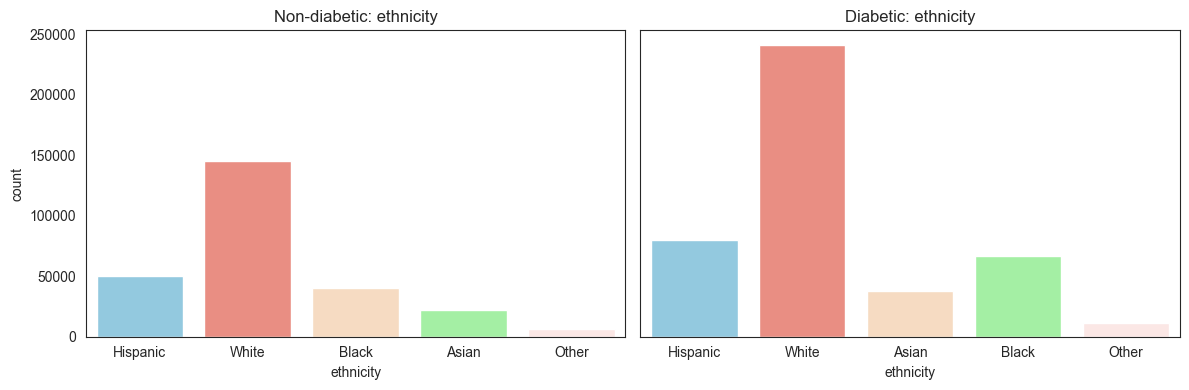

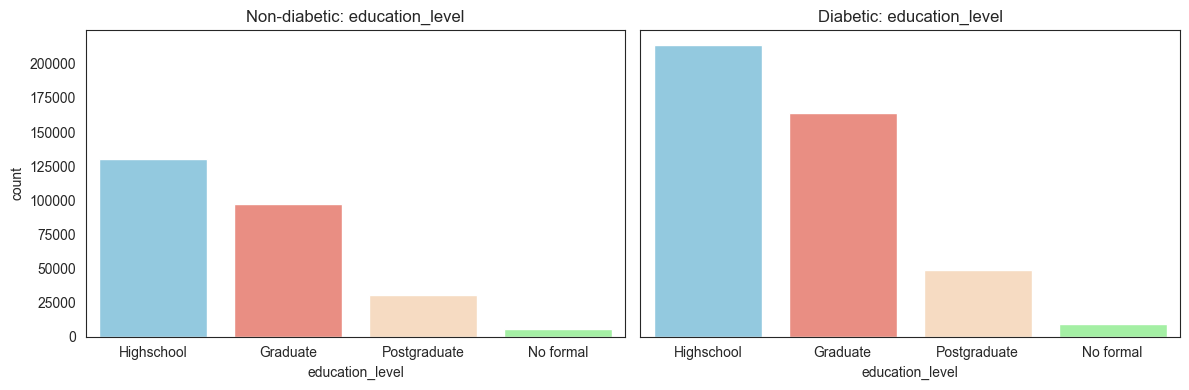

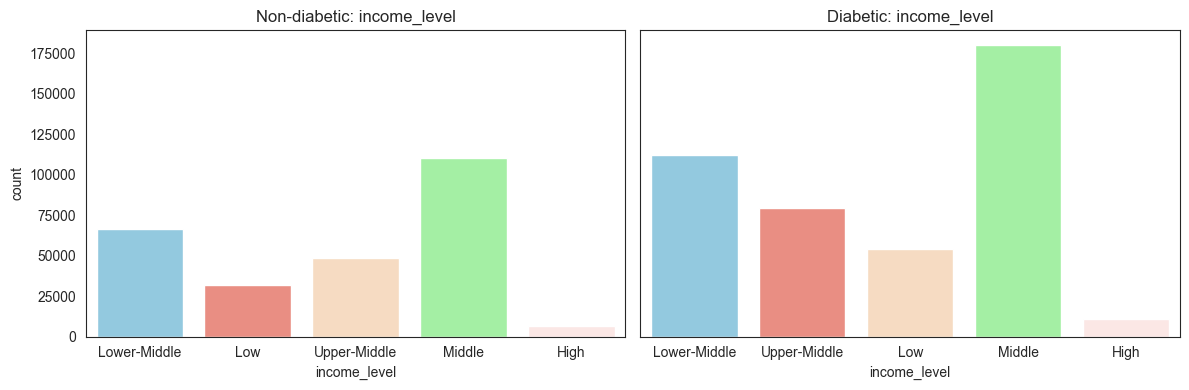

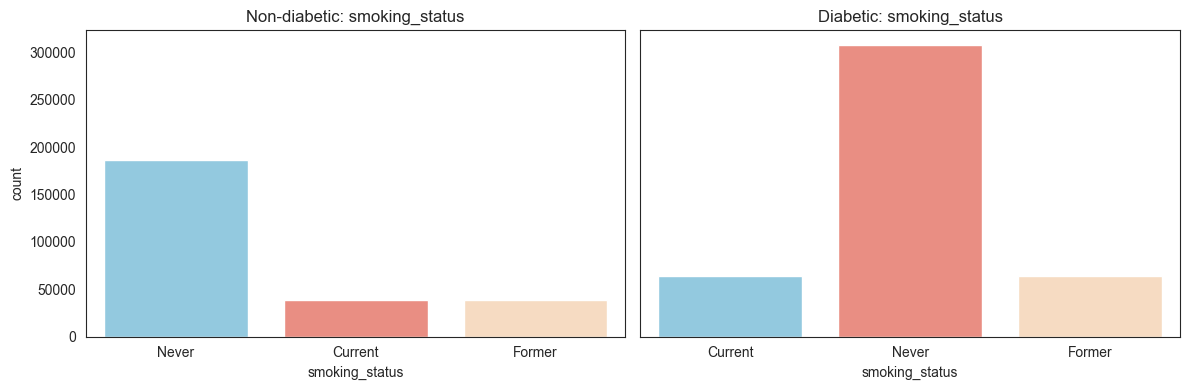

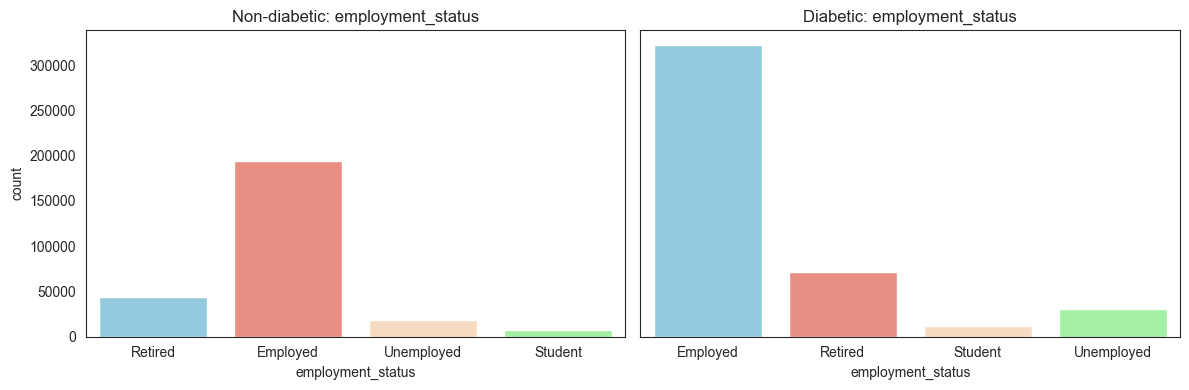

In [39]:
# countplots for categorical columns

palette = [   "skyblue", "salmon", "peachpuff", "palegreen", "mistyrose", "powderblue", "wheat",  "lightpink"]


for col in categorical_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12,4), sharey=True)
    
    n_cat = train_df[col].nunique()
    palette = palette
    # Non-diabetic
    sns.countplot(x=col, data=train_df[train_df['diagnosed_diabetes']==0],
                  ax=axes[0], palette=palette)
    axes[0].set_title(f"Non-diabetic: {col}")
    axes[0].tick_params(axis='x')
    
    # Diabetic
    sns.countplot(x=col, data=train_df[train_df['diagnosed_diabetes']==1],
                  ax=axes[1], palette=palette)
    axes[1].set_title(f"Diabetic: {col}")
    axes[1].tick_params(axis='x')
    
    plt.tight_layout()
    plt.show()


In [43]:
pairplot_cols = numerical_cols[:10] 


sns.pairplot(
    train_df[pairplot_cols + ["diagnosed_diabetes"]],
    hue="diagnosed_diabetes",
    diag_kind="kde",      
    corner=False,         
    plot_kws={"alpha":0.6, "s":40}  
)

plt.suptitle("Pair Plot of 10 Features by Diagnosed Diabetes", y=1.02)
plt.show()

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000002231E4E3D90> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

In [ ]:
#  a way for the skewnedd kutorsisand rnage in ecah columns 
# 
# unqiue value analysis on ctagroicla columsn

# Value Distributions for Categorical/Binary Columns:


# nyumurcla vales  Distribution Characteristics:

# age:
#   Min: 19
#   Max: 89
#   Mean: 50.36
#   Median: 50.00
#   Std: 11.66
#   Skewness: 0.02
#   Kurtosis: -0.39
#   Outliers (IQR method): 1013 (0.14%)

# https://www.kaggle.com/code/swarnabh31/ultimate-eda-for-diabetes-prediction-dataset

In [ ]:
Correlation of Features with Target:
diagnosed_diabetes                    1.000000
family_history_diabetes               0.211064
age                                   0.161162
systolic_bp                           0.107132
bmi                                   0.105580
ldl_cholesterol                       0.102771
triglycerides                         0.090635
cholesterol_total                     0.088112
waist_to_hip_ratio                    0.081050
diastolic_bp                          0.036271
hypertension_history                  0.029979
cardiovascular_history                0.024746
heart_rate                            0.023865
screen_time_hours_per_day             0.018213
sleep_hours_per_day                   0.003509
alcohol_consumption_per_week          0.002991
id                                   -0.000075
diet_score                           -0.050119
hdl_cholesterol                      -0.053231
physical_activity_minutes_per_week   -0.169789

In [ ]:
# https://www.kaggle.com/code/priyanshu594/diabetes-prediction-eda-lgbm-optuna/notebook

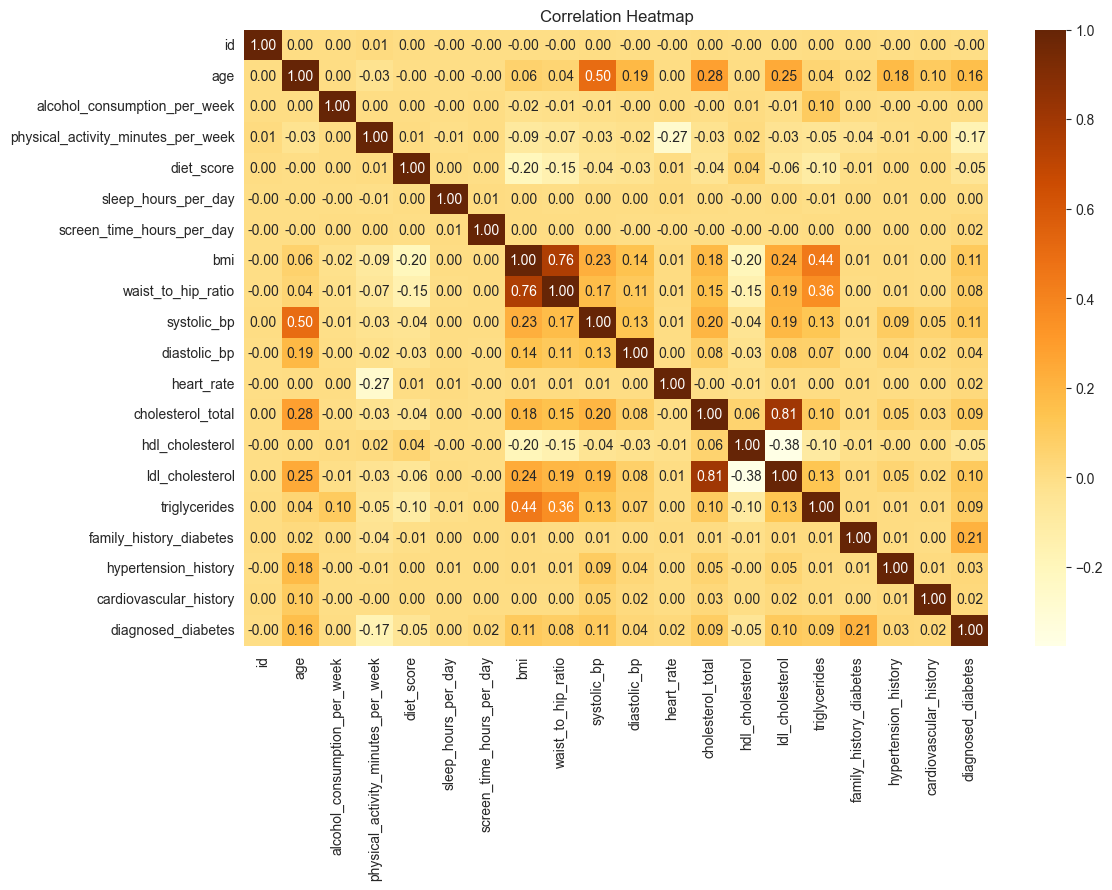

In [ ]:
# correlation analysis

plt.figure(figsize=(12,8))

numeric_df = train_df.select_dtypes(include=[np.number])
corr = numeric_df.corr()

sns.heatmap(corr, annot=True, fmt=".2f", cmap="YlOrBr", cbar=True)
plt.title("Correlation Heatmap")
plt.show()


In [ ]:

target_corr = corr["diagnosed_diabetes"].sort_values(ascending=False)

target_corr_df = target_corr.reset_index()
target_corr_df.columns = ["Feature", "Correlation_with_Target"]

target_corr_df.style.background_gradient(
    cmap="YlOrBr",
    subset=["Correlation_with_Target"]
)

In [ ]:
# box plot for diagteic non- biatic versis for tarin and tets too

In [ ]:
https://www.kaggle.com/code/ankushmehta1234567/advanced-eda-diabetes-pred - bEST ONE

## Feature Engineering

In [ ]:
https://www.kaggle.com/code/harshgupta4444/feature-engineering-randomforest-vs-xgboost

## Model Building

In [ ]:
https://www.kaggle.com/code/mpwolke/diabetes-decision-tree-prediction



https://www.kaggle.com/code/aiswarjya/diabetes-prediction-challenge-playground-series


https://www.kaggle.com/code/taprgmr/diabetes-prediciton-complete-xgboost-kfold-cv

https://www.kaggle.com/code/laasen/s5e12-eda-xgb-competition-starter